In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Getting input
The data has been obtained from raw data files that have been downloaded from UCI's online machhine learning repository, and not from Kaggle.

Also, we do not need to do any preprocessing as there are no missing values, and secondly, the features have already been scaled to fit within [-1,1].

In [12]:
X_train = pd.read_csv('X_train.txt', header = None, delim_whitespace = True)

In [19]:
y_train = pd.read_csv('y_train.txt', header = None)

In [14]:
X_test = pd.read_csv('X_test.txt', header = None, delim_whitespace = True)

In [15]:
y_test = pd.read_csv('y_test.txt', header = None)

In [74]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [75]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


# Classification using Multivariate LogisticRegression Classifier and its performance evaluation

The performance evaluation metric we'll be using is accuracy, the fraction of true positives and true negatives over the total number of samples. We could use the area under ROC curve as the evaluation metric but since this is a multivariate classification problem, it'd be just easier to evaluate performance in accuracy terms instead of precision and recall and then plotting the curve.

### LogisticRegression Classifier

Let's test the value of regularization parameter on classifier performance. The values we'll be testing for are 0.01, 0.1, 1, 10 and 100.

The algorithm we'll be using is newton-cg. This is takes a more direct approach to find the minima of a function than gradient descent. It supports only the L2 regularization penalty which is based on the squares of the regression coefficients where as the L1 is dependent on the absolute values of the coefficients.

In [67]:
accuracy_scores = []
for i in [0.01, 0.1, 1, 10, 100]:
    logreg = LogisticRegression(penalty = 'l2', C = i, random_state = 0, solver = 'newton-cg', multi_class = 'ovr', n_jobs = -1).fit(X_train, y_train.values.ravel())
    accuracy_scores.append(accuracy_score(logreg.predict(X_test), y_test))

In [156]:
accuracy_scores

[0.9355276552426196,
 0.95656599932134379,
 0.96131659314557172,
 0.96165592127587374,
 0.96233457753647778]

Looks like the best performance is obtained at a regualrization parameter value of 100.

Let's try plotting a confusion matrix from the classifier's predictions.

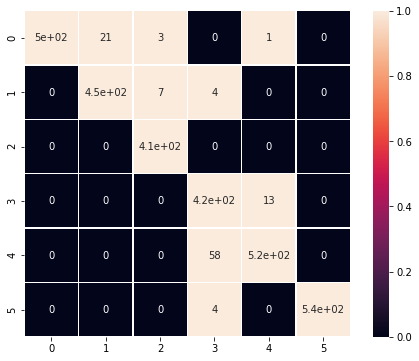

In [157]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(logreg.predict(X_test), y_test),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

It is pretty evident that classes 3 and 4 were predicted as 4 and 3 for quite a few number of test data instances.

# Classification using K-Nearest Neighbors Classifier and its performance evaluation

In [130]:
accuracy_rate =[]
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    predictions = knn.predict(X_test)
    accuracy_rate.append(accuracy_score(predictions, y_test))

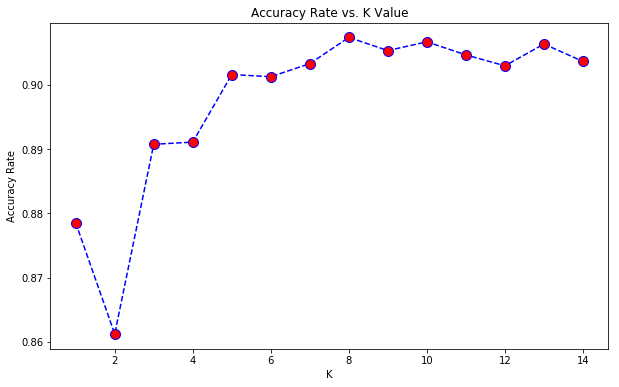

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

Looks like we have an optimum value of 8.

Let's try training the model with k=8.

In [152]:
knn_8 = KNeighborsClassifier(n_neighbors = 8, weights = 'distance').fit(X_train, y_train.values.ravel())
accuracy_score(knn_8.predict(X_test), y_test)

0.90973871733966749

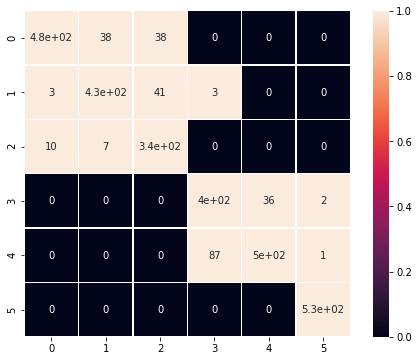

In [158]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(knn_8.predict(X_test), y_test),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

The numbers are more distributed as compared to the LogisticRegression Classifier.

# Conclusion

The LogisticRegression model has performed quite well in terms of accuracy, going as high as up to 97%, while the K-Nearest Neighbors comes up close with an accuracy of 91%. It is possible that there might be other classification models that may perform better, but that is out of scope for this project.